In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

In [2]:
data_file = np.load("test-fit.npz", allow_pickle=True)
print(data_file.files)

['eps', 'fe']


In [3]:
e = data_file['eps']
f = data_file['fe']
print(e.shape, f.shape)

(45,) (45,)


In [4]:
data_file2 = np.load("test-fit2.npz", allow_pickle=True)
e2 = data_file2['eps']
f2 = data_file2['fe']

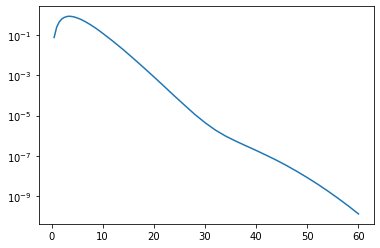

In [5]:
plt.figure()
plt.semilogy(e, e**2 * f)
plt.show()

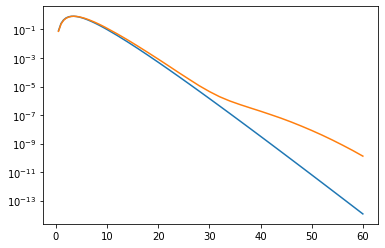

In [6]:
plt.figure()
plt.semilogy(e, (0.78)*(e**2)/(np.exp(e/1.5)+1))
plt.semilogy(e, e**2 * f)
plt.show()

In [7]:
def fit(e_array, f_array):
    e_max = e_array[np.where(e_array**2*f_array == np.max(e_array**2*f_array))[0]][0]
    f_max = f_array[np.where(e_array**2*f_array == np.max(e_array**2*f_array))[0]][0]
    
    T = e_max/2.301
    N = (((np.exp(e_max/T)+1)*np.max(e_array**2*f_array))/e_max**2)
    
    return T,N
    

In [8]:
fit(e,f)

(1.521077792264233, 0.7584999309603175)

In [9]:
fit(e2,f2)

(2.607561929595828, 13.757361244316078)

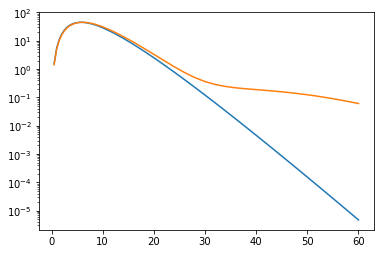

In [10]:
plt.figure()
plt.semilogy(e2, (13.75)*(e2**2)/(np.exp(e2/2.6)+1))
plt.semilogy(e2, e2**2 * f2)
plt.show()

In [163]:
@nb.jit(nopython=True)
def least_sum(e_array,f_array,T, N):
    Sum = 0 
    for i in range(len(e_array)):
        Sum = Sum + ((e_array[i]**2*f_array[i]-((N)*(e_array[i]**2)/(np.exp(e_array[i]/T)+1)))**2)
    return Sum 
T = np.linspace(1.283,1.717,100)
N = np.linspace(-0.15,1.65,100)
M = np.zeros((len(T),len(N)))
for i in range(len(T)):
    for j in range(len(N)):
        M[i,j] = least_sum(e,f,T[i],N[j])

In [164]:
least_sum(e,f,1.5,0.78)

0.0179507121865272

In [165]:
np.amin(M)

0.00012673998850192198

In [166]:
w = np.where(M==np.amin(M))
T_1 = T[w[0][0]]
N_1 = N[w[1][0]]

In [167]:
print(T_1)

1.5723333333333334


In [168]:
print(N_1)

0.7045454545454545


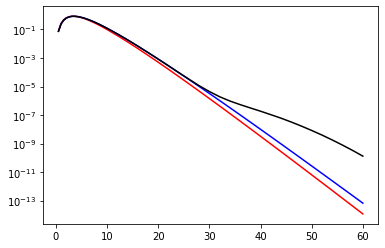

In [17]:
plt.figure()
plt.semilogy(e, (0.78)*(e**2)/(np.exp(e/1.5)+1),color="red")
plt.semilogy(e, (0.7045454545454545)*(e**2)/(np.exp(e/1.5723333333333334)+1),color="blue")
plt.semilogy(e, e**2 * f,color="black")
plt.show()

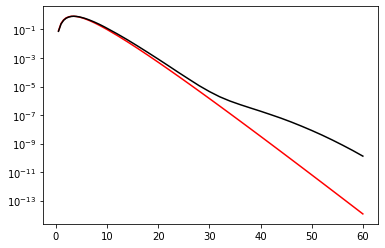

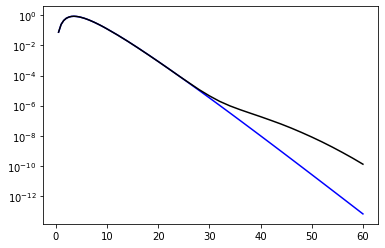

In [18]:
plt.figure()
plt.semilogy(e, (0.78)*(e**2)/(np.exp(e/1.5)+1),color="red")
plt.semilogy(e, e**2 * f,color="black")
plt.show()


plt.figure()
plt.semilogy(e, (0.7045454545454545)*(e**2)/(np.exp(e/1.5723333333333334)+1),color="blue")
plt.semilogy(e, e**2 * f,color="black")
plt.show()

In [19]:
@nb.jit(nopython=True)
def fit2(e_array, f_array):
    e_max = e_array[np.where(e_array**2*f_array == np.max(e_array**2*f_array))[0]][0]
    f_max = f_array[np.where(e_array**2*f_array == np.max(e_array**2*f_array))[0]][0]
    
    Del_e = e_array[1] - e_array[0]
    Del_T = (1/2.301)*Del_e
    
    T = e_max/2.301
    N = (((np.exp(e_max/T)+1)*np.max(e_array**2*f_array))/e_max**2)
    Del_N = (((np.exp(e_max/T+Del_T)+1)*np.max(e_array**2*f_array))/e_max**2)
    
    return T,N,Del_T,Del_N

In [20]:
fit2(e,f)

(1.521077792264233,
 0.7584999309603175,
 0.21729682746631898,
 0.9258373732530708)

In [21]:
@nb.jit(nopython=True)
def fit3(e_array,f_array):
    
    fit2(e_array,f_array)
    
    T_0, N_0, T_error, N_error = fit2(e_array,f_array)
    
    
    T = np.linspace(T_0-T_error,T_0+T_error,100)
    N = np.linspace(N_0-N_error,N_0+N_error,100)
    M = np.zeros((len(T),len(N)))
    for i in range(len(T)):
        for j in range(len(N)):
            M[i,j] = least_sum(e_array,f_array,T[i],N[j])
    
    w = np.where(M==np.amin(M))
    T_best = T[w[0][0]]
    N_best = N[w[1][0]]
    
    return T_best,N_best
    

In [22]:
fit3(e,f)

(1.5671710586964824, 0.7117404676647079)

In [23]:
fit3(e2,f2)

(2.7195027195027195, 12.570015639330949)

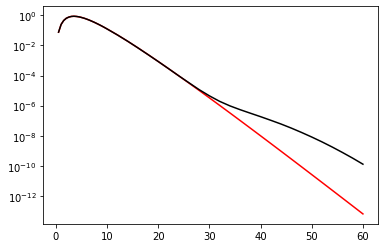

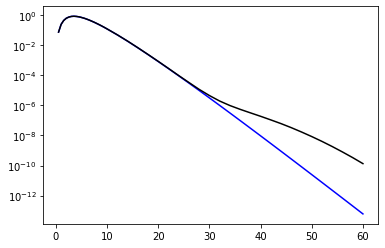

In [161]:
plt.figure()
plt.semilogy(e, ()*(e**2)/(np.exp(e/1.5723333333333334)+1),color="red")
plt.semilogy(e, e**2 * f,color="black")
plt.show()



plt.figure()
plt.semilogy(e, (0.7117404676647079)*(e**2)/(np.exp(e/1.5671710586964824)+1),color="blue")
plt.semilogy(e, e**2 * f,color="black")
plt.show()

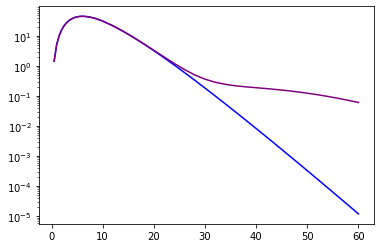

In [25]:
plt.figure()
plt.semilogy(e2, (12.570015639330949)*(e2**2)/(np.exp(e2/2.7195027195027195)+1),color="blue")
plt.semilogy(e2, e2**2 * f2,color="purple")
plt.show()

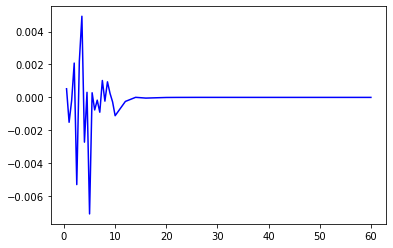

In [26]:
plt.figure()
plt.plot(e, (e**2*f)-((0.7045454545454545)*(e**2)/(np.exp(e/1.5723333333333334)+1)),color="blue")
plt.show()

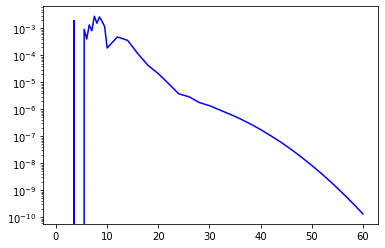

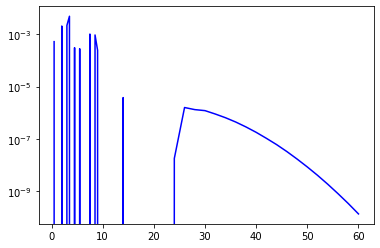

In [162]:
plt.figure()
plt.semilogy(e, (e**2*f)-((0.7117404676647079)*(e**2)/(np.exp(e/1.5671710586964824)+1)),color="blue")
plt.show()

plt.figure()
plt.semilogy(e, (e**2*f)-((0.7045454545454545)*(e**2)/(np.exp(e/1.5723333333333334)+1)),color="blue")
plt.show()


In [28]:
E_new = e[26:]
F_new = f[26:]

In [117]:
E_new

array([24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48.,
       50., 52., 54., 56., 58., 60.])

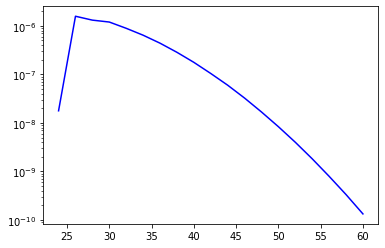

In [29]:
plt.figure()
plt.semilogy(E_new, (E_new**2*F_new)-((0.7117404676647079)*(E_new**2)/(np.exp(E_new/1.5671710586964824)+1)),color="blue")
plt.show()

In [30]:
diff = (E_new**2*F_new)-((0.7045454545454545)*(E_new**2)/(np.exp(E_new/1.5723333333333334)+1))

In [84]:
diff_5 = (e**2*f)-((0.7045454545454545)*(e**2)/(np.exp(e/1.5723333333333334)+1))

In [86]:
print(e2.shape)

(45,)


In [85]:
print(diff_5)

[ 5.25271639e-04 -1.51341222e-03 -1.86063456e-04  2.08581985e-03
 -5.29968660e-03  2.18972153e-03  4.93193734e-03 -2.72014824e-03
  3.07456605e-04 -7.08158545e-03  2.80986342e-04 -7.62649859e-04
 -1.68311176e-04 -9.01046919e-04  1.02734381e-03 -2.28198450e-04
  9.46781568e-04  2.45554870e-04 -2.72964757e-04 -1.11265850e-03
 -2.45586431e-04  3.79372094e-06 -4.23968688e-05 -2.36890379e-05
 -5.21765591e-06 -1.08988640e-06  1.77975038e-08  1.58010340e-06
  1.31374870e-06  1.20029415e-06  8.91667222e-07  6.42763311e-07
  4.40248378e-07  2.85603547e-07  1.77366706e-07  1.04556733e-07
  6.00025669e-08  3.25566937e-08  1.68266692e-08  8.37590159e-09
  4.00234316e-09  1.82481889e-09  7.95407068e-10  3.34513235e-10
  1.33479229e-10]


In [31]:
print(diff)

[1.77975038e-08 1.58010340e-06 1.31374870e-06 1.20029415e-06
 8.91667222e-07 6.42763311e-07 4.40248378e-07 2.85603547e-07
 1.77366706e-07 1.04556733e-07 6.00025669e-08 3.25566937e-08
 1.68266692e-08 8.37590159e-09 4.00234316e-09 1.82481889e-09
 7.95407068e-10 3.34513235e-10 1.33479229e-10]


In [230]:
len(diff)

19

None


In [218]:
np.polyfit(E_new,np.log(diff),2)

array([-1.02963236e-02,  6.34951558e-01, -2.42813632e+01])

In [33]:
q = -1.02963236e-02*E_new**2+6.34951558e-01*E_new-2.42813632e+01

In [34]:
Q = -1.02963236e-02*e**2+6.34951558e-01*e-2.42813632e+01

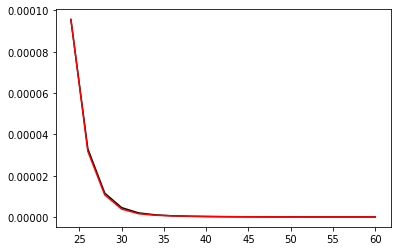

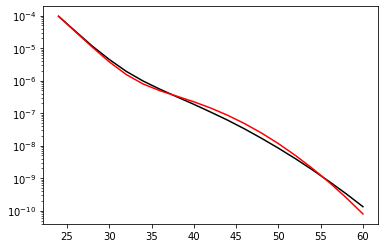

In [35]:
plt.figure()
plt.plot(E_new,E_new**2*F_new,color="black")
plt.plot(E_new,0.7045454545454545*(E_new**2)/(np.exp(E_new/1.5723333333333334)+1)+np.exp(q),color="red")
plt.show()


plt.figure()
plt.semilogy(E_new,E_new**2*F_new,color="black")
plt.semilogy(E_new,0.7045454545454545*(E_new**2)/(np.exp(E_new/1.5723333333333334)+1)+np.exp(q),color="red")
plt.show()

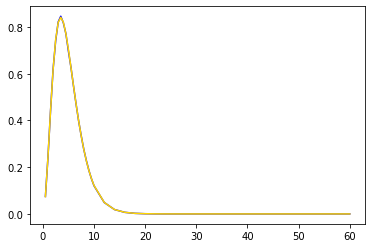

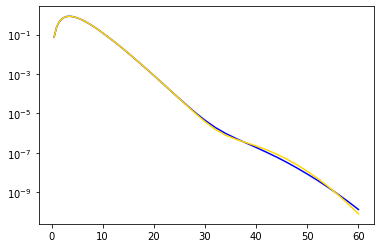

In [36]:
plt.figure()
plt.plot(e,e**2*f,color="blue")
plt.plot(e,0.7045454545454545*(e**2)/(np.exp(e/1.5723333333333334)+1)+np.exp(Q),color="gold")
plt.show()


plt.figure()
plt.semilogy(e,e**2*f,color="blue")
plt.semilogy(e,0.7045454545454545*(e**2)/(np.exp(e/1.5723333333333334)+1)+np.exp(Q),color="gold")
plt.show()

In [37]:
diff_1 = (F_new)-((0.7045454545454545)*(1)/(np.exp(E_new/1.5723333333333334)+1))

In [38]:
print(diff_1)

[3.08984442e-11 2.33743107e-09 1.67569988e-09 1.33366016e-09
 8.70768772e-10 5.56023625e-10 3.39697822e-10 1.97786390e-10
 1.10854191e-10 5.92725243e-11 3.09930614e-11 1.53859611e-11
 7.30324184e-12 3.35036064e-12 1.48015649e-12 6.25795231e-13
 2.53637458e-13 9.94391305e-14 3.70775637e-14]


In [39]:
np.polyfit(E_new,np.log(diff_1),2)

array([-9.67399293e-03,  5.32930528e-01, -2.85716588e+01])

In [40]:
poly = -9.67399293e-03*e**2+5.32930528e-01*e-2.85716588e+01

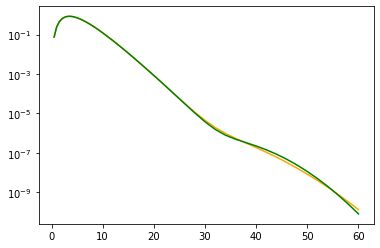

In [41]:
plt.figure()
plt.semilogy(e,e**2*f,color="orange")
plt.semilogy(e,0.7045454545454545*(e**2)/(np.exp(e/1.5723333333333334)+1)+e**2*np.exp(poly),color="green")
plt.show()

In [68]:
@nb.jit(nopython=True)
def mean_square(e_array,f_array,A_0,B_0,C_0):
    Sum = 0 
    for i in range(len(e_array)):
        Sum = Sum + ((e_array[i]**2*f_array[i]-(((0.7117404676647079)*(e_array[i]**2)/(np.exp(e_array[i]/1.5671710586964824)+1))+e_array[i]**2*np.exp(A_0*e_array[i]**2+B_0*e_array[i]+C_0)))**2)
    return Sum


In [69]:
mean_square(e,f,-9.6e-03,5.3e-01,-2.8e+01)

0.00023109445196148952

In [70]:
@nb.jit(nopython=True)
def best_quick(e_array,f_array):
    
    A_0 = np.linspace(0.5*-9.6e-03,2*-9.6e-03,100)
    B_0 = np.linspace(0.5*5.3e-01,2*5.3e-01,100)
    C_0 = np.linspace(0.5*-2.8e+01,2*-2.8e+01,100)

    M_1 = np.zeros((len(A_0),len(B_0),len(C_0)))
    for i in range(len(A_0)):
        for j in range(len(B_0)):
            for k in range(len(C_0)):
                M_1[i,j,k] = mean_square(e_array,f_array,A_0[i],B_0[j],C_0[k])
    
    
    w_1 = np.where(M_1==np.amin(M_1))
    A_best = A_0[w_1[0][0]]
    B_best = B_0[w_1[1][0]]
    C_best = C_0[w_1[2][0]]
    
    return A_best,B_best,C_best

In [75]:
best_quick(E_new,F_new)

(-0.009163636363636363, 0.265, -19.939393939393938)

In [76]:
poly_1 = A_best*e**2+B_best*e+C_best

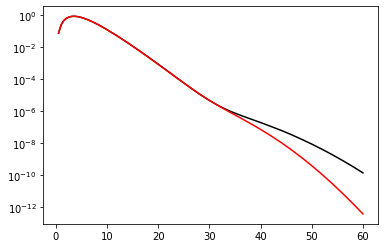

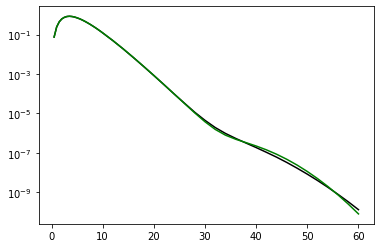

In [77]:
plt.figure()
plt.semilogy(e,e**2*f,color="black")
plt.semilogy(e,0.7117404676647079*(e**2)/(np.exp(e/1.5671710586964824)+1)+e**2*np.exp(poly_1),color="red")
plt.show()


plt.figure()
plt.semilogy(e,e**2*f,color="black")
plt.semilogy(e,0.7045454545454545*(e**2)/(np.exp(e/1.5723333333333334)+1)+e**2*np.exp(poly),color="green")
plt.show()

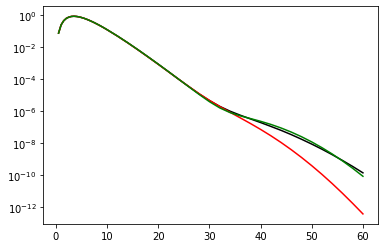

In [78]:
plt.figure()
plt.semilogy(e,e**2*f,color="black")
plt.semilogy(e,0.7117404676647079*(e**2)/(np.exp(e/1.5671710586964824)+1)+e**2*np.exp(poly_1),color="red")
plt.semilogy(e,0.7045454545454545*(e**2)/(np.exp(e/1.5723333333333334)+1)+e**2*np.exp(poly),color="green")
plt.show()


In [273]:
def everything1(e_array,f_array):
    fit3(e_array,f_array)
    Tbest,Nbest = fit3(e_array,f_array)
    e_array_reverse = e_array[::-1]
    f_array_reverse = f_array[::-1]
    E_diff = np.zeros(len(e_array_reverse))
    
    for i in range(len(e_array_reverse)):
        E_diff[i] = (f_array_reverse[i])-((Nbest)/(np.exp(e_array_reverse[i]/Tbest)+1))
    return E_diff,Tbest,Nbest

In [274]:
def everything2(e_array,f_array):
    
    everything1(e_array,f_array)
    
    E_smaller_reverse,T_best,N_best = everything1(e_array,f_array)
    
    E_smaller = []
    for i in E_smaller_reverse: 
        if i < 0:
            break
        if i > 0:
            E_smaller.append(i)
    E_smaller_diff = E_smaller[::-1]
    E_new = e_array[len(e_array)-len(E_smaller_diff):]
    F_new = f_array[len(e_array)-len(E_smaller_diff):]
    
    
    np.polyfit(E_new,np.log(E_smaller_diff),2) 
    A_best = np.polyfit(E_new,np.log(E_smaller_diff),2)[0]
    B_best = np.polyfit(E_new,np.log(E_smaller_diff),2)[1]
    C_best = np.polyfit(E_new,np.log(E_smaller_diff),2)[2]
    
    poly = A_best*e_array**2+B_best*e_array+C_best
    
    
    plt.figure()
    plt.semilogy(e_array,e_array**2*f_array,color="black")
    plt.semilogy(e_array,N_best*(e_array**2)/(np.exp(e_array/T_best)+1)+e**2*np.exp(poly),color="green")
    plt.show()
    
    return A_best,B_best,C_best
    




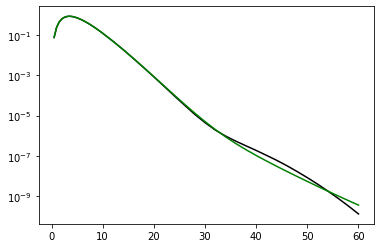

(0.0012908544032027547, -0.4484654379921326, -7.659854919569376)

In [275]:
everything2(e,f)

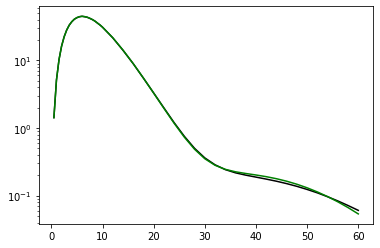

(-0.002040106185677538, 0.09924849888416934, -9.722659061181984)

In [277]:
everything2(e2,f2)